# Лабораторная работа №3 (часть 3)
## Метрики классификации (Titanic Dataset)

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, ConfusionMatrixDisplay,
    precision_recall_curve, roc_curve, auc
)

In [13]:
df = pd.read_csv("Titanic.csv")
data = df.drop(columns=["PassengerId", "Name", "Ticket", "Cabin"])
data.dropna(inplace=True)
data["Sex"] = data["Sex"].map({"male": 0, "female": 1})
data["Embarked"] = data["Embarked"].map({"S": 0, "C": 1, "Q": 2})
X = data.drop("Survived", axis=1)
y = data["Survived"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Логистическая регрессия и метрики качества

Precision: 0.7901234567901234
Recall: 0.6956521739130435
F1: 0.7398843930635838


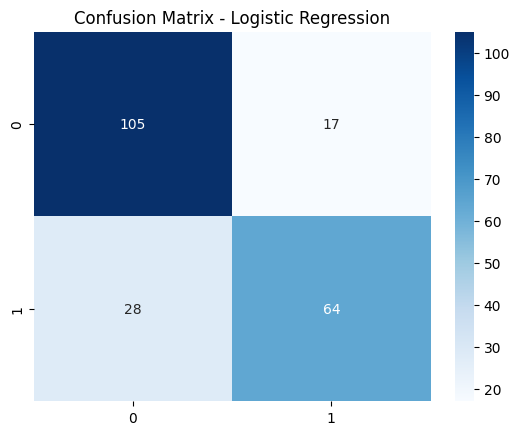

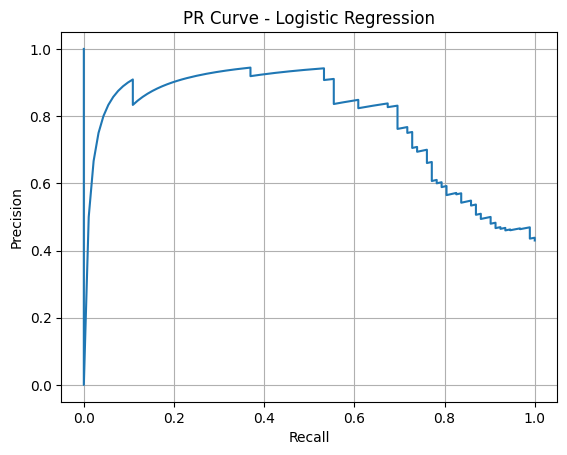

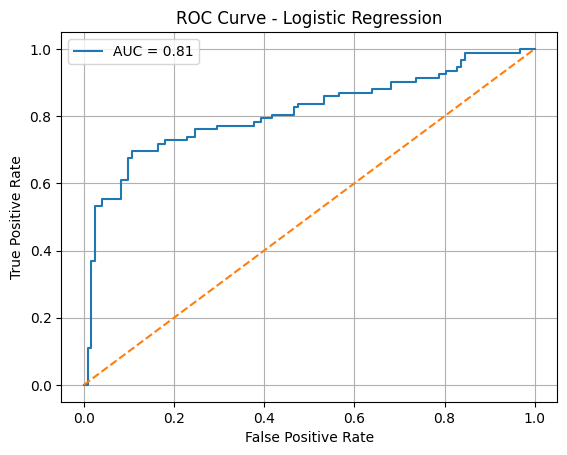

In [14]:
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
log_pred = log_model.predict(X_test)
log_proba = log_model.predict_proba(X_test)[:, 1]

print("Precision:", precision_score(y_test, log_pred))
print("Recall:", recall_score(y_test, log_pred))
print("F1:", f1_score(y_test, log_pred))

# Матрица ошибок
sns.heatmap(confusion_matrix(y_test, log_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

# PR-кривая
precision, recall, _ = precision_recall_curve(y_test, log_proba)
plt.plot(recall, precision)
plt.title("PR Curve - Logistic Regression")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.grid()
plt.show()

# ROC-кривая
fpr, tpr, _ = roc_curve(y_test, log_proba)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], '--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend()
plt.grid()
plt.show()

## Метод опорных векторов (SVM)

In [15]:
svm_model = SVC(probability=True)
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)
svm_proba = svm_model.predict_proba(X_test)[:, 1]

print("SVM - Precision:", precision_score(y_test, svm_pred))
print("SVM - Recall:", recall_score(y_test, svm_pred))
print("SVM - F1:", f1_score(y_test, svm_pred))

SVM - Precision: 0.6666666666666666
SVM - Recall: 0.3695652173913043
SVM - F1: 0.4755244755244755


## Метод k-ближайших соседей (KNN)

In [16]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
knn_pred = knn_model.predict(X_test)

print("KNN - Precision:", precision_score(y_test, knn_pred))
print("KNN - Recall:", recall_score(y_test, knn_pred))
print("KNN - F1:", f1_score(y_test, knn_pred))

KNN - Precision: 0.5490196078431373
KNN - Recall: 0.6086956521739131
KNN - F1: 0.5773195876288659
